In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [74]:
df=pd.read_csv(r"D:\IMDb Movies India.csv",encoding="cp1252")
print(df)

                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                             #Homecoming -2021.0   90 min   Drama, Musical   
3                                 #Yaaram -2019.0  110 min  Comedy, Romance   
4                       ...And Once Again -2010.0  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga -1988.0      NaN           Action   
15505                               Zulmi -1999.0  129 min    Action, Drama   
15506                           Zulmi Raj -2005.0      NaN           Action   
15507                       Zulmi Shikari -1988.0      NaN           Action   
15508                        Zulm-O-Sitam -1998.0  130 min    Action, Drama   

       Rating Votes            Director           A

In [75]:
df['Year']=df['Year'].abs()
print(df['Year'])

0           NaN
1        2019.0
2        2021.0
3        2019.0
4        2010.0
          ...  
15504    1988.0
15505    1999.0
15506    2005.0
15507    1988.0
15508    1998.0
Name: Year, Length: 15509, dtype: float64


In [76]:
df.shape

(15509, 10)

In [77]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [78]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [79]:
df.describe()


,Year,Rating
count,14981.000000,7919.000000
mean,1987.012215,5.841621
std,25.416689,1.381777
min,1913.000000,1.100000
25%,1968.000000,4.900000
50%,1991.000000,6.000000
75%,2009.000000,6.800000
max,2022.000000,10.000000


In [80]:
df.describe(include ='all')


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981.000000,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,NaN,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,NaN,120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,240,2780,NaN,227,58,158,83,91
mean,NaN,1987.012215,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,25.416689,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,1913.000000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1968.000000,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1991.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2009.000000,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [81]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [82]:
df.dropna(subset=["Year","Genre","Director","Actor 1","Actor 3"],inplace=True)
df.isnull().sum()

Name           0
Year           0
Duration    4641
Genre          0
Rating      3528
Votes       3527
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [83]:
df['Duration'].unique()


array(['109 min', '90 min', '110 min', '105 min', '147 min', '142 min',
       '82 min', '116 min', '96 min', '120 min', '161 min', '166 min',
       '102 min', nan, '87 min', '132 min', '66 min', '146 min',
       '168 min', '158 min', '126 min', '94 min', '138 min', '124 min',
       '144 min', '157 min', '136 min', '107 min', '113 min', '80 min',
       '122 min', '149 min', '148 min', '130 min', '121 min', '188 min',
       '115 min', '103 min', '114 min', '170 min', '100 min', '99 min',
       '140 min', '128 min', '93 min', '125 min', '145 min', '75 min',
       '111 min', '134 min', '104 min', '92 min', '137 min', '127 min',
       '150 min', '119 min', '135 min', '76 min', '151 min', '95 min',
       '112 min', '143 min', '177 min', '117 min', '123 min', '72 min',
       '154 min', '175 min', '153 min', '78 min', '139 min', '133 min',
       '180 min', '60 min', '46 min', '164 min', '162 min', '171 min',
       '160 min', '152 min', '62 min', '163 min', '165 min', '141 min',
  

In [84]:
df["Duration"]=df["Duration"].str.replace(" min","").astype(float)
df["Duration"].head()


1    109.0
2     90.0
3    110.0
4    105.0
5    147.0
Name: Duration, dtype: float64

In [85]:
df["Duration"].fillna(df["Duration"].median(),inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_6988\2306410942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Duration"].fillna(df["Duration"].median(),inplace=True)


In [86]:
df['Rating'].unique()

array([ 7. ,  nan,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  3.1,  3.3,  7.8,  8.4,
        5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  4.2,  5.3,  3.4,
        5.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  7.6,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9.6,  1.7,  9. ,  1.4,  8.9,  1.9,  9.1,  9.4,
        9.7,  1.8,  9.2,  2. ,  1.6, 10. ,  2.2,  1.1])

In [87]:
df["Rating"].fillna(df["Rating"].mean(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6988\322049203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rating"].fillna(df["Rating"].mean(),inplace=True)


In [88]:
df['Votes'].unique()

array(['8', nan, '35', ..., '70,344', '408', '1,496'], dtype=object)

In [89]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df["Votes"].fillna(df["Votes"].median(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6988\1249529634.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Votes"].fillna(df["Votes"].median(),inplace=True)


In [90]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [91]:
df.shape

(11086, 10)

In [92]:
df["Genre"]=df["Genre"].str.split(",").explode("Genre").reset_index(drop=True)

In [93]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,Musical,5.811127,38.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,Comedy,4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Romance,5.811127,38.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147.0,Drama,4.700000,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [94]:
year_ratings = df.groupby('Year')['Rating'].mean()
print(year_ratings.idxmax())

1917.0


In [95]:
df.sort_values(by="Rating", ascending=False).reset_index(drop=True)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Love Qubool Hai,2020.0,94.0,Action,10.0,5.0,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
1,Half Songs,2021.0,79.0,Crime,9.7,7.0,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2,Breed,2020.0,133.0,Romance,9.6,48.0,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
3,June,2021.0,93.0,Comedy,9.4,18.0,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
4,Gho Gho Rani,2019.0,105.0,Action,9.4,47.0,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
...,...,...,...,...,...,...,...,...,...,...
11081,Welcome to New York,2018.0,118.0,Action,1.6,774.0,Chakri Toleti,Richard Harris,Jasmine Kaur,Sonakshi Sinha
11082,Mumbai Can Dance Saalaa,2015.0,135.0,Action,1.6,43.0,Sachindra Sharma,Shakti Kapoor,Prashant Narayanan,Aditya Pancholi
11083,Jimmy,2008.0,133.0,Comedy,1.6,249.0,Raj N. Sippy,Mimoh Chakraborty,Vikas Anand,Rahul Dev
11084,Desh Drohi,2008.0,140.0,Drama,1.4,38.0,Jagdish A. Sharma,Kamal Rashid Khan,Gracy Singh,Hrishitaa Bhatt


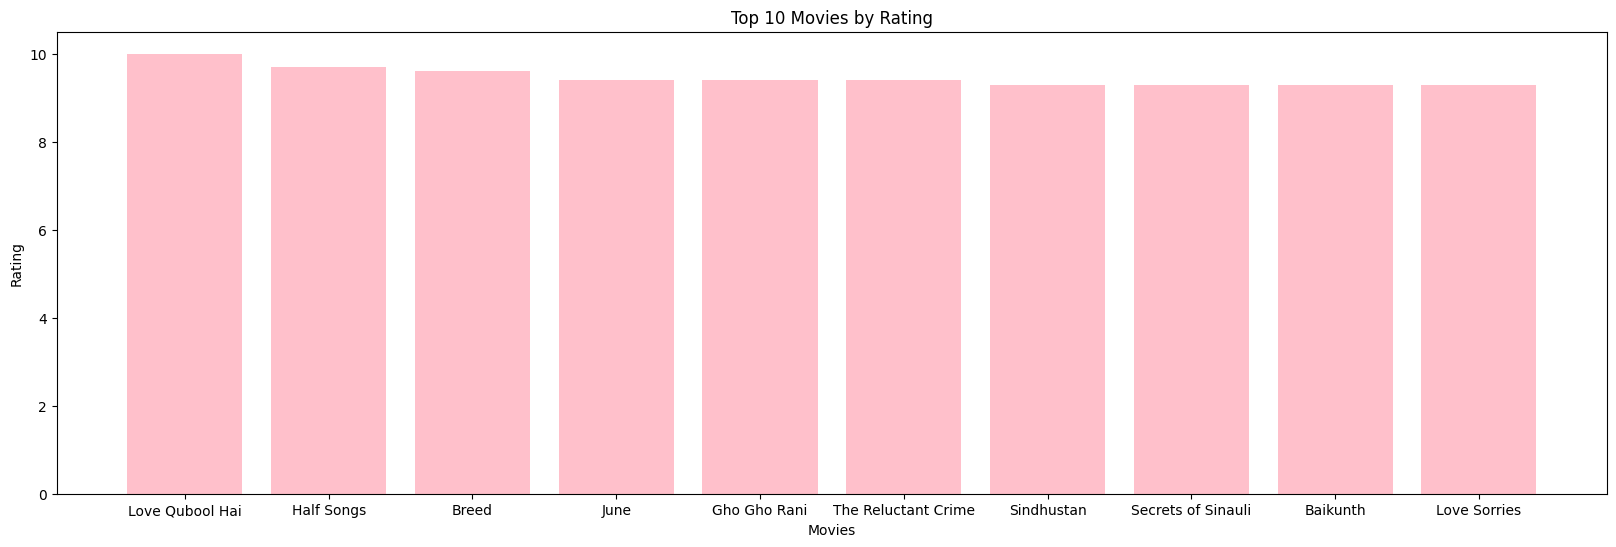

In [96]:
top10_rated_movies = df.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(20, 6))
plt.bar(top10_rated_movies['Name'], top10_rated_movies['Rating'], color='pink')

plt.xlabel('Movies')
plt.ylabel('Rating')
plt.title('Top 10 Movies by Rating')
plt.show()

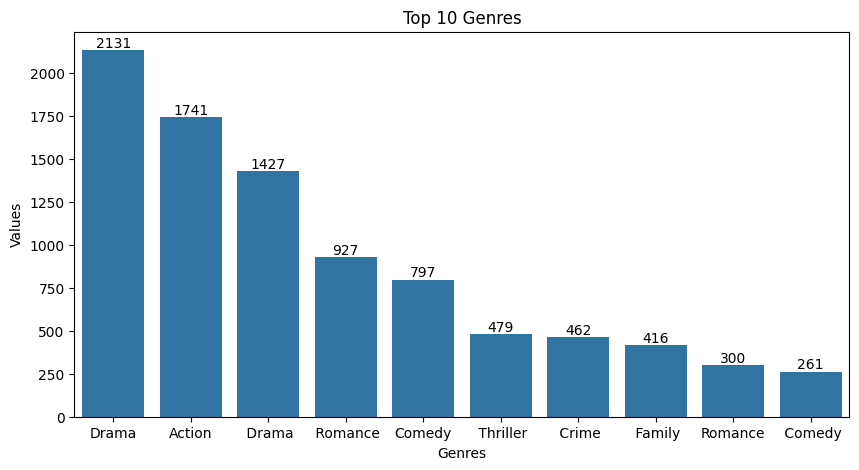

In [97]:
top10_genres=df["Genre"].value_counts().head(10)
plt.figure(figsize=(10,5))
bar=sns.barplot(x=top10_genres.index,y=top10_genres.values)
bar.bar_label(bar.containers[0])
plt.xlabel("Genres")
plt.ylabel("Values")
plt.title("Top 10 Genres")
plt.show()

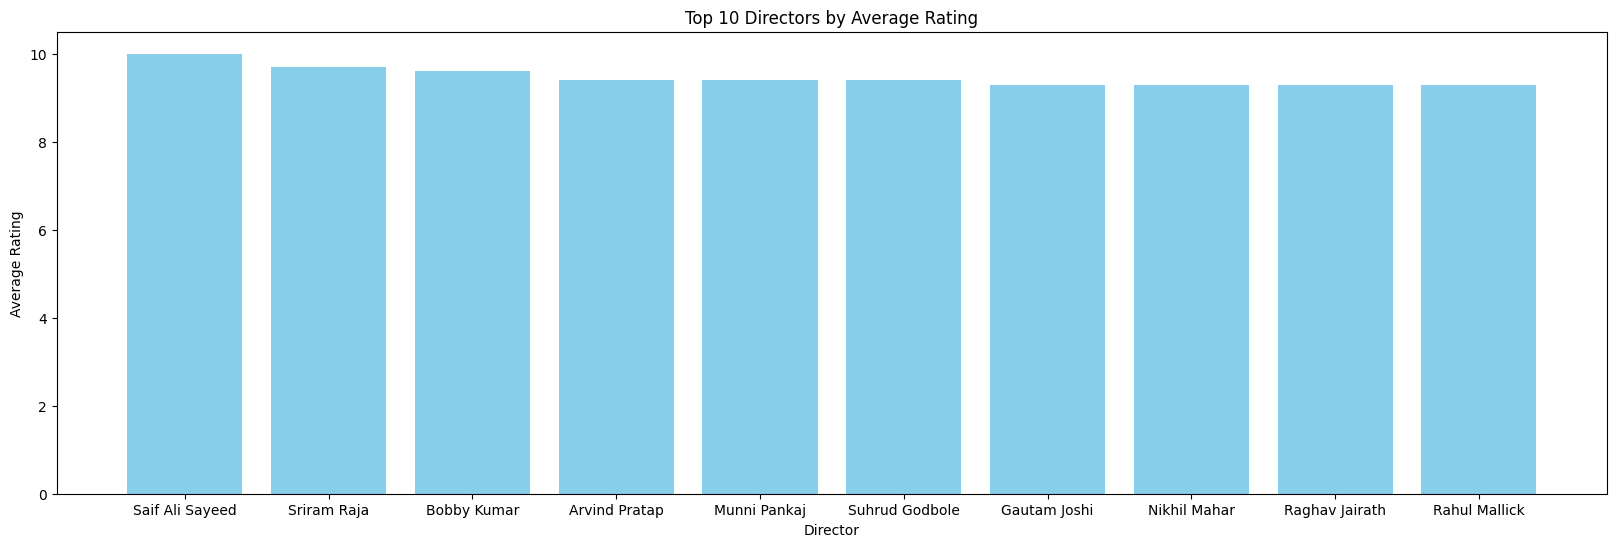

In [98]:
director_ratings = df.groupby('Director')['Rating'].mean().reset_index()
top_directors = director_ratings.nlargest(10, 'Rating')
plt.figure(figsize=(20, 6))
plt.bar(top_directors['Director'], top_directors['Rating'], color='skyblue')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors by Average Rating')
plt.show()

Text(0.5, 1.0, 'Number of Movies Per Year')

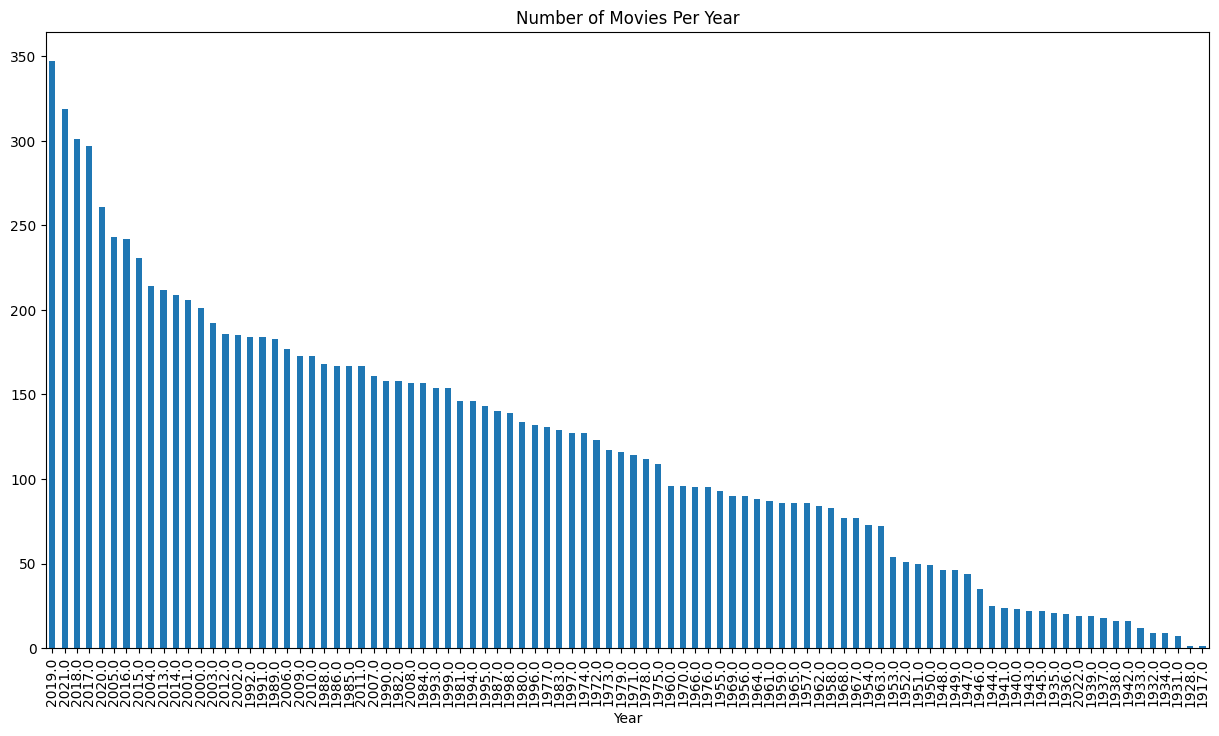

In [99]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')

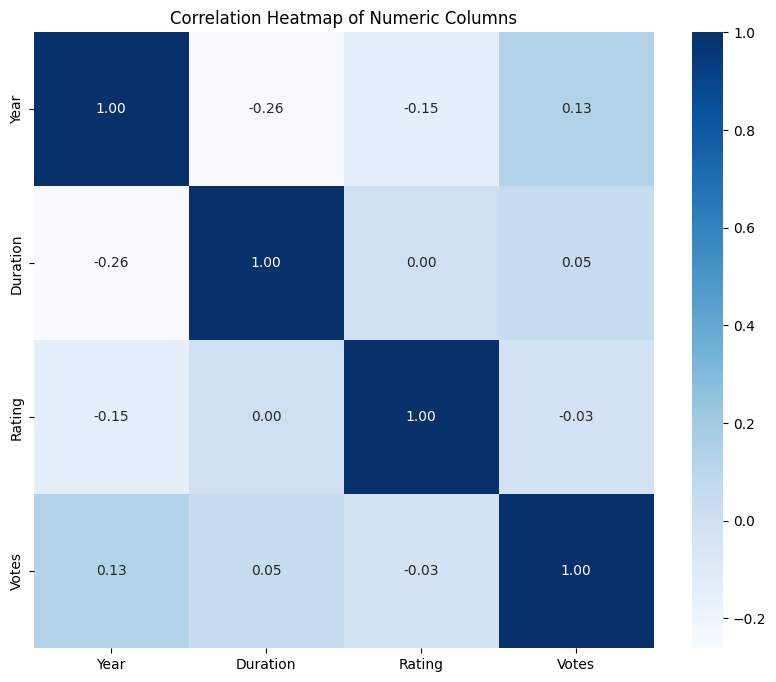

In [100]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [101]:
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']
df['actor1_encoded'] = round(df['Actor 1'].map(actor1_encoding_map), 1)
df['actor2_encoded'] = round(df['Actor 2'].map(actor2_encoding_map), 1)
df['actor3_encoded'] = round(df['Actor 3'].map(actor3_encoding_map), 1)
df['director_encoded'] = round(df['Director'].map(director_encoding_map), 1)
df['genre_encoded'] = round(df['Genre'].map(genre_encoding_map), 1)
df.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
X = df[['Year', 'Duration', 'Votes', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [102]:
print('Linear Regression Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('R2 Score:', r2_score(y_test, lr_pred))
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))

Linear Regression Metrics:
Mean Squared Error: 0.360348372757639
Mean Absolute Error: 0.4273295473684407
R2 Score: 0.7209500103175785

Random Forest Regressor Metrics:
Mean Squared Error: 0.2918049418988624
Mean Absolute Error: 0.3285615268971373
R2 Score: 0.7740293222277885


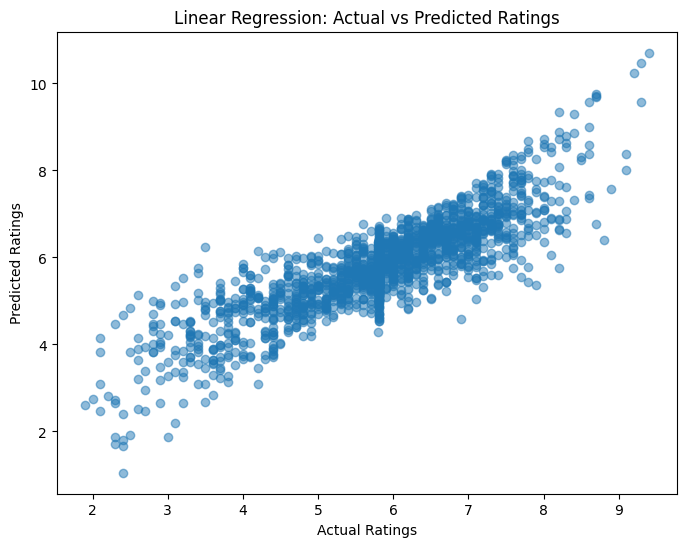

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


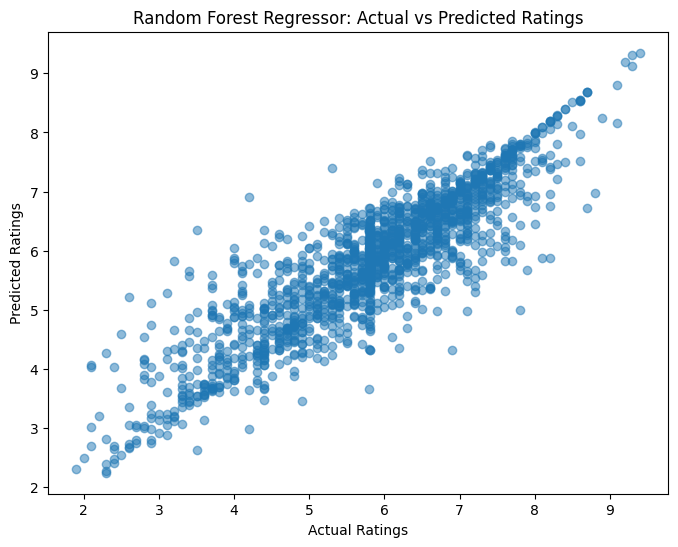

In [104]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()